# Evaluating Classification Models


In this notebook we're going to evaluate classification models using a new metric called **ROC-AUC**.

As we've seen a standard classification metric is the accuracy which is defined as:

* the number of samples correctly classified over the total number of samples.

The Accuracy is a natural metric that is easy to understand. 

But it does fall short in the context of highly imbalanced datasets
when the positive class you want to detect or predict is rare compared to the negative class.


Let's import the packages and load the credit dataset and transform the ourcome variable default into an integer.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

df = pd.read_csv('./data/credit_default.csv')

df.loc[df.default == 'Yes', 'default'] = 1
df.loc[df.default == 'No', 'default'] = 0


print("df.shape {}".format(df.shape))

print("\ndf.default.value_counts() \n{}".format(df.default.value_counts()))


df.shape (10000, 4)

df.default.value_counts() 
0    9667
1     333
Name: default, dtype: int64


## The accuracy paradox

The original credit dataset has 10000 samples with just only 333 people who have defaulted on their credit.

If we define a very simple model that always predict that no one defaults,
we get an accuracy of

9667 / 1000 = 96.67 %

which is a great score but totally worthless since it never detects a person at risk of defaulting.

that's why we need a better measure of the performance of classification models.

Let's build a more sensible model


In [8]:
model = smf.logit('default ~ income + balance + student', data = df)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        17:18:02   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance            0.0057      0.000     24.737      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

and print the confusion matrix

In [9]:
print(result.pred_table())

[[9627.   40.]
 [ 228.  105.]]


this confusion matrix is obtained for a default classification threshold of 0.5.


For different a classification threshold we get a different classification matrix



In [12]:
print(result.pred_table(threshold = 0.15))

[[9283.  384.]
 [ 109.  224.]]


The ROC Curve is obtained by plotting the True positive rate over the True Negative rate while varying the classification threshold.

For that we use the scikit learn package


In [13]:
from sklearn.metrics import roc_curve
yhat= result.predict()
fpr, tpr, thresholds = roc_curve(df['default'], yhat)


Then we can plot the ROC curve


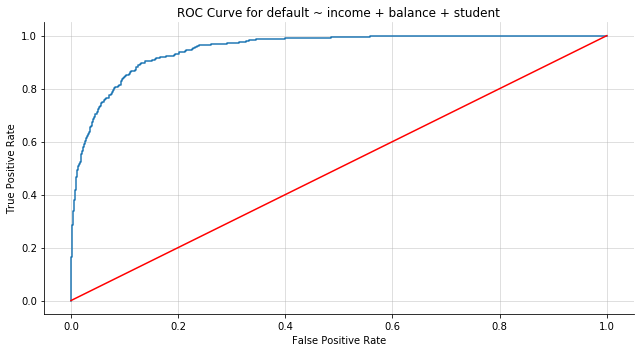

In [14]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
plt.plot(fpr, tpr, label = '')
plt.plot([0,1], [0,1] , color = 'red', linestyle = '-'  )
plt.title("ROC Curve for default ~ income + balance + student")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(alpha = 0.5)
sns.despine()
plt.tight_layout()


Next we calculate the AUC which represents the Area Under the ROC Curve, also using scikit learn


In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df['default'], yhat)



0.9495581233452343

Which is a very good score!
